In [1]:
from adjustText import adjust_text

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

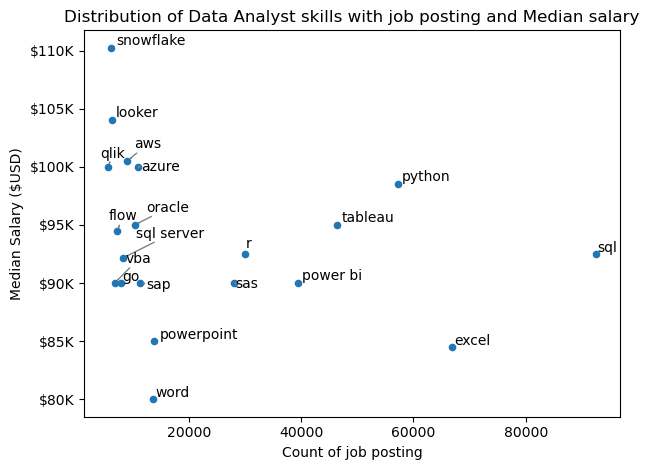

In [18]:
df = df[df['job_title_short'] == 'Data Analyst']
df_explode = df.explode('job_skills')
skills_stat = df_explode.groupby('job_skills').agg(         # grouping by job skills but we want to uae to aggregate functions.
    skills_count = ('job_skills', 'count'),   # create a dictionary-like and name the column, count jobskills
    median_salary = ('salary_year_avg', 'median')  # find the median salary of the salary of the year
)
df_skills_stat = skills_stat.sort_values(by= 'skills_count', ascending= False).head(20)
df_skills_stat.plot(kind= 'scatter', x= 'skills_count', y= 'median_salary')

texts = []
plt.xlabel('Count of job posting')
plt.ylabel('Median Salary ($USD)')
plt.title ('Distribution of Data Analyst skills with job posting and Median salary')
# for labelling...
for i,txt in enumerate(df_skills_stat.index):
    texts.append(plt.text(df_skills_stat['skills_count'].iloc[i], df_skills_stat['median_salary'].iloc[i], txt ))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'grey', lw= 1))

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))

plt.tight_layout()
